This is the Analysis Model of the KPI

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('Performance_Management-History_Query-Template_3G_Availability-HAZEL_NCUBE-20240326104334.xlsx')
df_site_name = pd.read_excel('site_names.xlsx')

#(df_site_name.shape)


In [3]:
df

,Index,Begin Time,End Time,Granularity,SubnetWork ID,SubnetWork Name,ManagedElement ID,Managed Element,SITE ID,SITE Name,BTS ID,BTS Name,306004:TCH in service rate(%),306024:TCH total traffic number(erl),900134113:U31_Aggregate PS Data (MB)_900134_1_gv4.bsc-MO
0,1,2024-02-01 00:00:00,2024-02-02 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),1786,MID0201-RN-IMG,1,MID0201-RN-IMG1A,1.0000,13.2256,127.0
1,2,2024-02-01 00:00:00,2024-02-02 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),1786,MID0201-RN-IMG,2,MID0201-RN-IMG1B,1.0000,29.3842,249.0
2,3,2024-02-01 00:00:00,2024-02-02 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),1786,MID0201-RN-IMG,3,MID0201-RN-IMG1C,1.0000,10.4822,231.0
3,4,2024-02-01 00:00:00,2024-02-02 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),1786,MID0201-RN-IMG,4,MID0201-RN-IMD1A,1.0000,10.1656,232.0
4,5,2024-02-01 00:00:00,2024-02-02 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),1786,MID0201-RN-IMG,5,MID0201-RN-IMD1B,1.0000,6.9364,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45812,45813,2024-03-25 00:00:00,2024-03-26 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),3217,MID0224-RN-IMG,5,MID0224-RN-IMD1B,0.5195,4.8239,90.0
45813,45814,2024-03-25 00:00:00,2024-03-26 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),3217,MID0224-RN-IMG,6,MID0224-RN-IMD1C,0.5195,19.7644,636.0
45814,45815,2024-03-25 00:00:00,2024-03-26 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),4083,MID0240-RN-IMG,1,MID0240-RN-OMM1A,1.0000,217.7517,1331.0
45815,45816,2024-03-25 00:00:00,2024-03-26 00:00:00,1 day,223,MID1001-CN-ZBSC001(223),223,MID1001-CN-ZBSC001(223),4083,MID0240-RN-IMG,2,MID0240-RN-OMM1B,1.0000,137.0042,1530.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45817 entries, 0 to 45816
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     45817 non-null  int64  
 1   Begin Time                                                45817 non-null  object 
 2   End Time                                                  45817 non-null  object 
 3   Granularity                                               45817 non-null  object 
 4   SubnetWork ID                                             45817 non-null  int64  
 5   SubnetWork Name                                           45817 non-null  object 
 6   ManagedElement ID                                         45817 non-null  int64  
 7   Managed Element                                           45817 non-null  object 
 8   SITE ID         

In [5]:
#Changing the names so that the data sets can be merged
df['SiteCode'] = df['SITE Name']
df['ServiceRate'] = df['306004:TCH in service rate(%)']
df['TotalTraffic'] = df['306024:TCH total traffic number(erl)']
df['PSData'] = df['900134113:U31_Aggregate PS Data (MB)_900134_1_gv4.bsc-MO']
 
    
df_site_name['SiteCode']= df_site_name['Unnamed: 0']
df_site_name['SiteName']= df_site_name['Unnamed: 1']
df_site = df_site_name[['SiteCode','SiteName']]
#making the site code values the same for both dataset 
df['SiteCode'] = df['SiteCode'].str.split('-', expand=True)[0]

In [6]:
df['Begin Time'].min()

'2024-02-01 00:00:00'

In [7]:
#Data Cleaning
df_Nan = df.isna().sum()
df_is_Null = df.isnull().sum()
df_missing = df.dropna()
#Check Completenes 
nan_counts_per_column = df.isna().sum(axis=0)
total_rows = df.shape[0]
percent_missing_column = (nan_counts_per_column / total_rows) * 100
#print(percent_missing_column)
#Duplicates
duplicates = df_missing.duplicated()
duplicates
df_duplicates = df_missing.drop_duplicates()
#df_duplicates


In [8]:
#Check Consistency

df_duplicates.dtypes
try:
  df_duplicates['Begin Time'] = pd.to_datetime(df_duplicates['Begin Time'], format='%Y-%m-%d')
  df_duplicates['End Time'] = pd.to_datetime(df_duplicates['End Time'], format='%Y-%m-%d ')
except ValueError:  
  try:
    df_duplicates['Begin Time'] = pd.to_datetime(df_duplicates['Begin Time'])
    df_duplicates['End Time'] = pd.to_datetime(df_duplicates['End Time'])
  except pd.errors.ParserError:  
        print("Warning: Could not automatically convert 'Begin Time' and 'End Time' columns to datetime format")

df_duplicates.dtypes

Index                                                                int64
Begin Time                                                  datetime64[ns]
End Time                                                    datetime64[ns]
Granularity                                                         object
SubnetWork ID                                                        int64
SubnetWork Name                                                     object
ManagedElement ID                                                    int64
Managed Element                                                     object
SITE ID                                                              int64
SITE Name                                                           object
BTS ID                                                               int64
BTS Name                                                            object
306004:TCH in service rate(%)                                      float64
306024:TCH total traffic 

In [9]:
# data to use 
df_drop = df_duplicates[['Begin Time','End Time','Granularity','Managed Element','SiteCode','BTS Name','ServiceRate','TotalTraffic']]
df_drop


,Begin Time,End Time,Granularity,Managed Element,SiteCode,BTS Name,ServiceRate,TotalTraffic
0,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1A,1.0000,13.2256
1,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1B,1.0000,29.3842
2,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1C,1.0000,10.4822
3,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMD1A,1.0000,10.1656
4,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMD1B,1.0000,6.9364
...,...,...,...,...,...,...,...,...
45812,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0224,MID0224-RN-IMD1B,0.5195,4.8239
45813,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0224,MID0224-RN-IMD1C,0.5195,19.7644
45814,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0240,MID0240-RN-OMM1A,1.0000,217.7517
45815,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0240,MID0240-RN-OMM1B,1.0000,137.0042


In [10]:
#checking outliers for Service Rate using domain knowlege 

df_outlier1 = df_drop.ServiceRate < 0 
print('NUmber of Outlier is the lower bound',df_outlier1.sum())
df_outlier2 = df_drop.ServiceRate > 1 
print('Number of Outlier in the Upper Bound',df_outlier2.sum())

#removing

# df_without)outliers1 = df_drop[


NUmber of Outlier is the lower bound 0
Number of Outlier in the Upper Bound 0


C:\Users\hazel.ncube\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ServiceRate'>

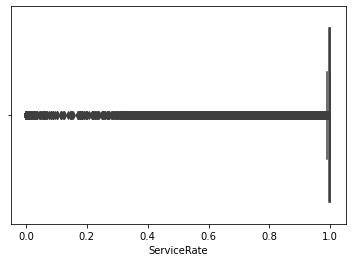

In [11]:
sns.boxplot(df_drop.ServiceRate)

In [12]:
df_drop.TotalTraffic.median()
print('Minimum Value',df_drop.TotalTraffic.min() )
print('Standard DEviation',df_drop.TotalTraffic.std() )
print('Average',df_drop.TotalTraffic.mean() )
print('Median',df_drop.TotalTraffic.median() )
print('Maximim Value',df_drop.TotalTraffic.max() )
min_threshold , max_threshold = df_drop.TotalTraffic.quantile([0.00,1])
df_outlier1 = df_drop.TotalTraffic < min_threshold
print('NUmber of Outlier is the lower bound for TotalTraffic',df_outlier1.sum())
df_outlier2 = df_drop.TotalTraffic > max_threshold
print('Number of Outlier in the Upper Bound for Total Traffic',df_outlier2.sum())


Minimum Value 0.0
Standard DEviation 119.72476621287773
Average 121.50566784599613
Median 81.2789
Maximim Value 1007.5819
NUmber of Outlier is the lower bound for TotalTraffic 0
Number of Outlier in the Upper Bound for Total Traffic 0


C:\Users\hazel.ncube\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalTraffic'>

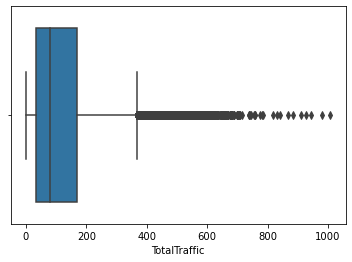

In [13]:
sns.boxplot(df_drop.TotalTraffic)

In [14]:
 df_drop_outlier = df_drop[(df_drop.TotalTraffic < max_threshold) & (df_drop.TotalTraffic >= min_threshold) ]
print(df_drop_outlier.shape)
print('Minimum Value',df_drop_outlier.TotalTraffic.min() )
print('Standard DEviation',df_drop_outlier.TotalTraffic.std() )
print('Average',df_drop_outlier.TotalTraffic.mean() )
print('Median',df_drop_outlier.TotalTraffic.median() )
print('Maximim Value',df_drop_outlier.TotalTraffic.max() )
df_outlier1 = df_drop_outlier.TotalTraffic < min_threshold
print('NUmber of Outlier is the lower bound for TotalTraffic',df_outlier1.sum())
df_outlier2 = df_drop_outlier.TotalTraffic > max_threshold
print('Number of Outlier in the Upper Bound for Total Traffic',df_outlier2.sum())

(45816, 8)
Minimum Value 0.0
Standard DEviation 119.65448236665705
Average 121.48632795966485
Median 81.27584999999999
Maximim Value 978.5725
NUmber of Outlier is the lower bound for TotalTraffic 0
Number of Outlier in the Upper Bound for Total Traffic 0


C:\Users\hazel.ncube\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(45816,)

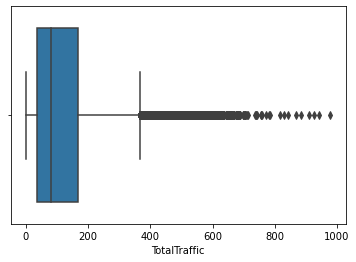

In [15]:
sns.boxplot(df_drop_outlier.TotalTraffic)
df_drop_outlier.TotalTraffic.shape

In [16]:
#Anomalies in our dataset
# Service is 0 but there is Traffic
df_final = df_drop_outlier[(df_drop_outlier.TotalTraffic > 0) & (df_drop_outlier.ServiceRate == 0) ]
df_processed =  df_drop_outlier[((df_drop_outlier.TotalTraffic == 0) & (df_drop_outlier.ServiceRate == 0)) | (df_drop_outlier.TotalTraffic >= 0) & (df_drop_outlier.ServiceRate > 0) ]
#df_final
df_processed

,Begin Time,End Time,Granularity,Managed Element,SiteCode,BTS Name,ServiceRate,TotalTraffic
0,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1A,1.0000,13.2256
1,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1B,1.0000,29.3842
2,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1C,1.0000,10.4822
3,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMD1A,1.0000,10.1656
4,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMD1B,1.0000,6.9364
...,...,...,...,...,...,...,...,...
45812,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0224,MID0224-RN-IMD1B,0.5195,4.8239
45813,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0224,MID0224-RN-IMD1C,0.5195,19.7644
45814,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0240,MID0240-RN-OMM1A,1.0000,217.7517
45815,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0240,MID0240-RN-OMM1B,1.0000,137.0042


In [17]:
df_site = df_site_name[['SiteCode','SiteName']]
#Duplicates
print('Before duplicates removal',df_site.shape)
df_duplicates = df_site.drop_duplicates()
print('After Duplicates Removal',df_duplicates.shape)
#Mising values
print('Before missing values removal',df_duplicates.shape)
df_missing = df_duplicates.dropna()
print('After missing Removal',df_missing.shape)

df_site_final = df_missing 

print(df_site_final.shape)





Before duplicates removal (703, 2)
After Duplicates Removal (163, 2)
Before missing values removal (163, 2)
After missing Removal (163, 2)
(163, 2)


In [23]:
df_merged = df_processed.merge(df_site_final, on='SiteCode', how='left')
if 'Site Code' in df_merged.columns:
    df_merged['SiteCode'] = df_merged['SiteCode'].fillna(df_merged['SiteCode'],inplace =True)  

# df_site = df_site_name[['SiteCode','SiteName']]
#Duplicates
print('DF Porocessed',df_processed.shape)
print('Before duplicates removal',df_merged.shape)
df_duplicate = df_merged.drop_duplicates()
print('After Duplicates Removal',df_duplicate.shape)
#Mising values
print('Before missing values removal',df_duplicate.shape)
df_miss = df_duplicate.dropna()
print('After missing Removal',df_miss.shape)
df_analysis = df_miss

df_analysis.to_csv('C:/Users/hazel.ncube/Desktop/kpi_analysis/kpi_analysis/CleanedData/JupyterCleanedDataset.csv',index=False)


DF Porocessed (45816, 8)
Before duplicates removal (45816, 9)
After Duplicates Removal (45816, 9)
Before missing values removal (45816, 9)
After missing Removal (41106, 9)


In [26]:

df_0= pd.read_csv('C:/Users/hazel.ncube/Desktop/kpi_analysis/kpi_analysis/CleanedData/JupyterCleanedDataset.csv')
df_0

,Begin Time,End Time,Granularity,Managed Element,SiteCode,BTS Name,ServiceRate,TotalTraffic,SiteName
0,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1A,1.0000,13.2256,Midlands State University 2
1,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1B,1.0000,29.3842,Midlands State University 2
2,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMG1C,1.0000,10.4822,Midlands State University 2
3,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMD1A,1.0000,10.1656,Midlands State University 2
4,2024-02-01,2024-02-02,1 day,MID1001-CN-ZBSC001(223),MID0201,MID0201-RN-IMD1B,1.0000,6.9364,Midlands State University 2
...,...,...,...,...,...,...,...,...,...
41101,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0221,MID0221-RN-OMD1B,0.9846,90.2594,Zvishavane Peak
41102,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0221,MID0221-RN-OMD1C,0.9861,43.5856,Zvishavane Peak
41103,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0084,MID0084-RN-OMM1A,0.9852,318.9253,Mount Shamba
41104,2024-03-25,2024-03-26,1 day,MID1001-CN-ZBSC001(223),MID0084,MID0084-RN-OMM1B,0.9855,332.0006,Mount Shamba


In [27]:
df_analysis.SiteCode.unique()

array(['MID0201', 'MID0001', 'MID0003', 'MID0004', 'MID0005', 'MID0006',
       'MID0007', 'MID0008', 'MID0009', 'MID0010', 'MID0011', 'MID0012',
       'MID0013', 'MID0014', 'MID0015', 'MID0016', 'MID0017', 'MID0018',
       'MID0019', 'MID0020', 'MID0021', 'MID0022', 'MID0023', 'MID0024',
       'MID0025', 'MID0026', 'MID0027', 'MID0028', 'MID0029', 'MID0030',
       'MID0031', 'MID0032', 'MID0033', 'MID0034', 'MID0035', 'MID0037',
       'MID0038', 'MID0039', 'MID0040', 'MID0041', 'MID0042', 'MID0043',
       'MID0045', 'MID0046', 'MID0047', 'MID0048', 'MID0049', 'MID0050',
       'MID0051', 'MID0052', 'MID0053', 'MID0054', 'MID0060', 'MID0061',
       'MID0062', 'MID0063', 'MID0064', 'MID0065', 'MID0066', 'MID0067',
       'MID0069', 'MID0070', 'MID0073', 'MID0100', 'MID0101', 'MID0102',
       'MID0103', 'MID0104', 'MID0105', 'MID0106', 'MID0107', 'MID0108',
       'MID0109', 'MID0110', 'MID0111', 'MID0113', 'MID0114', 'MID0116',
       'MID0117', 'MID0118', 'MID0119', 'MID0120', 

In [28]:
section_a_mask = df_analysis['SiteCode'].between('MID0001', 'MID0100')
section_b_mask = df_analysis['SiteCode'].between('MID0101', 'MID0219')

section_a = df_analysis[section_a_mask]
section_b = df_analysis[section_b_mask]

print("Section A:")
print(section_a.shape)
print("\nSection B:")
print(section_b.shape)

Section A:
(19427, 9)

Section B:
(20062, 9)


shape (324, 9)
TotalTraffic


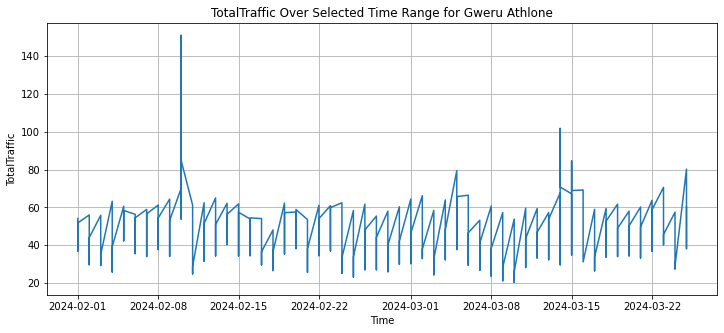

In [31]:
start_time = '2024-02-01'
end_time = '2024-02-02'
Sitename ='Gweru Athlone'
variables ='TotalTraffic'
df_name = section_a
df_name = df_analysis[df_analysis['SiteName'] == Sitename]
mask = (df_name['Begin Time'] >= start_time) & (df_name['End Time'] <=  end_time)
filtered_df = df_name .loc[mask]
print('shape',df_name.shape)
df_name.set_index('Begin Time', inplace=True)

print(variables)
plt.figure(figsize=(12, 5))
plt.plot(df_name.index, df_name[variables])
plt.xlabel('Time')
plt.ylabel(f'{variables}')
plt.title(f'{variables} Over Selected Time Range for {Sitename}')
plt.xticks(rotation=0)
plt.grid(True)

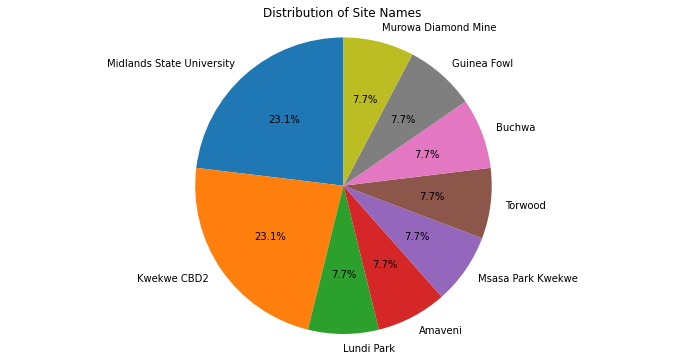

In [32]:
start_time = '2024-02-01'
end_time = '2024-02-02'
section = section_a
filtered_df = section[
    (section['Begin Time'] >= start_time) & (section['End Time'] <= end_time)  
]
filtered_df_2 = filtered_df[(filtered_df['TotalTraffic'] >= 0) & (filtered_df['TotalTraffic'] <= 10) ]
filtered_df_3 = filtered_df_2[(filtered_df_2['ServiceRate'] >= 0) & (filtered_df_2['ServiceRate'] <= 1) ]
df_new = filtered_df_3.SiteName.value_counts()
df_new.value_counts()


plt.figure(figsize=(12, 6))  
plt.pie(df_new,labels=df_new.index,  autopct='%1.1f%%', startangle=90)  
plt.title('Distribution of Site Names')
plt.axis('equal')
plt.show()





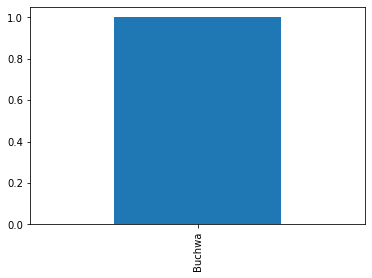

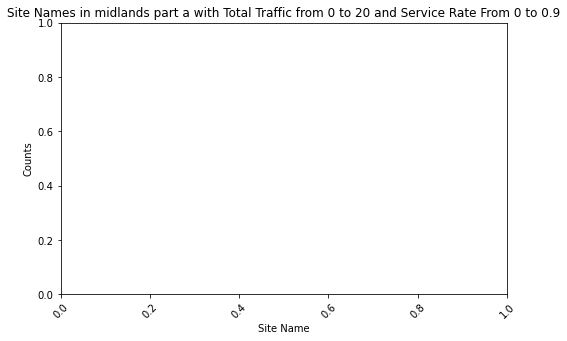

In [36]:
section = section_a
filtered_df = section[(section['Begin Time'] >= start_time) & (section['End Time'] <= end_time)]
traffic_1 = 0
traffic_2 = 20
service_1 = 0
service_2 = 0.9
filtered_df_2 = filtered_df[(filtered_df['TotalTraffic'] >= traffic_1) & (filtered_df['TotalTraffic'] <= traffic_2)]
filtered_df_3 = filtered_df_2[(filtered_df_2['ServiceRate'] >= service_1) & (filtered_df_2['ServiceRate'] <= service_2)]
df_new = filtered_df_3['SiteName'].value_counts()
a = 'midlands part a'

df_new.plot(kind='bar')
plt.figure(figsize=(8, 5))
plt.xlabel('Site Name')
plt.ylabel('Counts')
plt.xticks(rotation=45) 
plt.title(f'Site Names in {a} with Total Traffic from {traffic_1} to {traffic_2} and Service Rate From {service_1} to {service_2}')
plt.show()
   

In [37]:
section_b.SiteName.value_counts()

Midlands State University 2    324
Gokwe 3                        324
Nyama                          324
Shurugwi Town                  324
Zvishavane Town                324
                              ... 
Chiodza USF                    162
Gangata                        162
Mabasa                         162
Gweru Innscor Micro            108
Kwekwe Bus Terminus Micro      108
Name: SiteName, Length: 78, dtype: int64

In [38]:
df_analysis.sample(20)
print(df_analysis.shape)

(41106, 9)


In [39]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 45779
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Begin Time       41106 non-null  datetime64[ns]
 1   End Time         41106 non-null  datetime64[ns]
 2   Granularity      41106 non-null  object        
 3   Managed Element  41106 non-null  object        
 4   SiteCode         41106 non-null  object        
 5   BTS Name         41106 non-null  object        
 6   ServiceRate      41106 non-null  float64       
 7   TotalTraffic     41106 non-null  float64       
 8   SiteName         41106 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 3.1+ MB


In [40]:
df_analysis["Begin Time"].describe()

C:\Users\HAZEL~1.NCU\AppData\Local\Temp/ipykernel_4500/1734966834.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_analysis["Begin Time"].describe()


count                   41106
unique                     54
top       2024-02-28 00:00:00
freq                      762
first     2024-02-01 00:00:00
last      2024-03-25 00:00:00
Name: Begin Time, dtype: object

In [41]:
df_analysis["End Time"].describe()

C:\Users\HAZEL~1.NCU\AppData\Local\Temp/ipykernel_4500/1861417099.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_analysis["End Time"].describe()


count                   41106
unique                     54
top       2024-02-29 00:00:00
freq                      762
first     2024-02-02 00:00:00
last      2024-03-26 00:00:00
Name: End Time, dtype: object

In [42]:
df_analysis.ServiceRate.describe()

count    41106.000000
mean         0.960579
std          0.138963
min          0.000000
25%          0.997300
50%          1.000000
75%          1.000000
max          1.000000
Name: ServiceRate, dtype: float64

In [43]:
df_analysis.TotalTraffic.describe()

count    41106.000000
mean       122.904170
std        121.586505
min          0.000000
25%         34.975950
50%         81.598050
75%        167.908350
max        978.572500
Name: TotalTraffic, dtype: float64

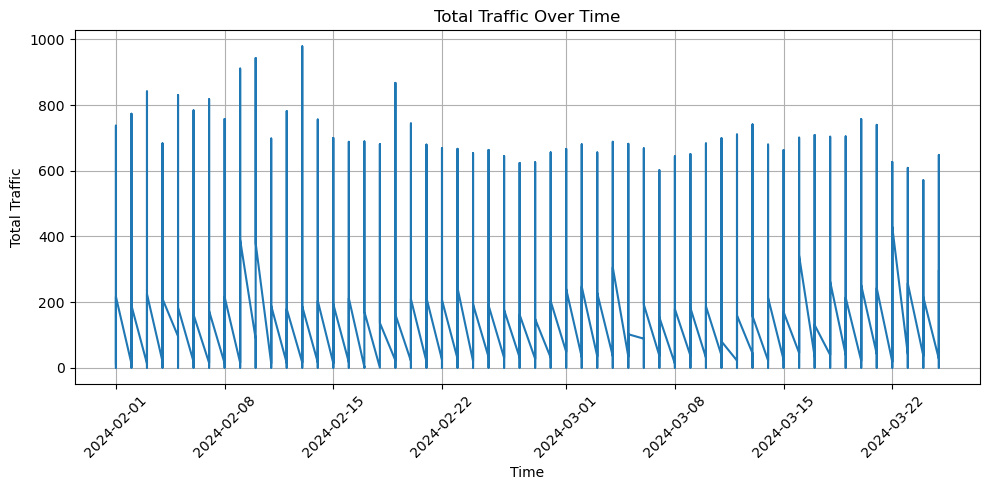

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(df_analysis['Begin Time'], df_analysis['TotalTraffic'], label='TotalTraffic')
plt.xlabel('Time')
plt.ylabel('Total Traffic')
plt.title('Total Traffic Over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



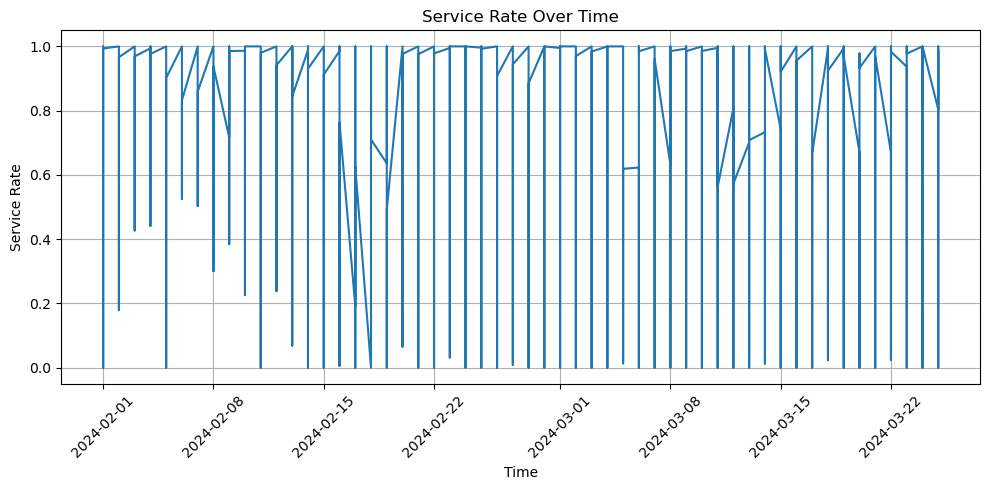

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(df_analysis['Begin Time'], df_analysis['ServiceRate'], label='Service Rate')
plt.xlabel('Time')
plt.ylabel('Service Rate')
plt.title('Service Rate Over Time')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [72]:
site_with_low = df_analysis[(df_analysis.ServiceRate == 0) & (df_analysis["End Time"] < "2024-02-28")]
print("Summary Statistics for Sites with 0 Service Rate in The month of February")
site_with_low.SiteName.value_counts()


Summary Statistics for Sites with 0 Service Rate in The month of February


SiteName
Sable Chemicals                15
Zvishavane Birthday            12
Mkoba 3                        12
Pakame                          9
Gweru Second Street Clinic      6
Midlands State University 2     6
Redcliff 2                      6
Golden Quarry                   3
Nemangwe                        2
Buchwa                          1
Name: count, dtype: int64

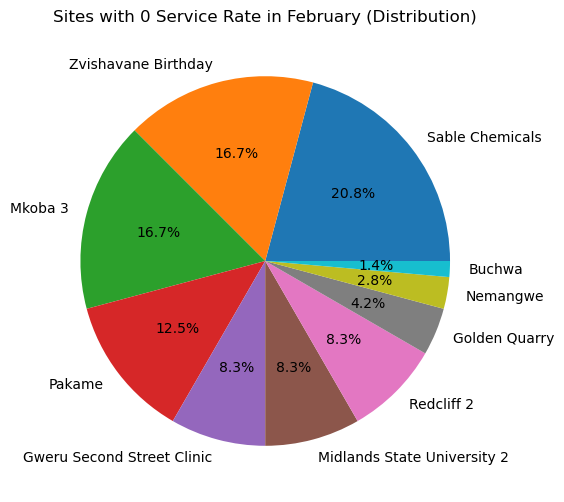

In [73]:
site_names = site_with_low['SiteName'].value_counts().index.to_numpy()
site_counts = site_with_low['SiteName'].value_counts().to_numpy()
plt.figure(figsize=(6, 6))  
plt.pie(site_counts, labels=site_names, autopct="%1.1f%%")  
plt.title("Sites with 0 Service Rate in February (Distribution)")
plt.show()

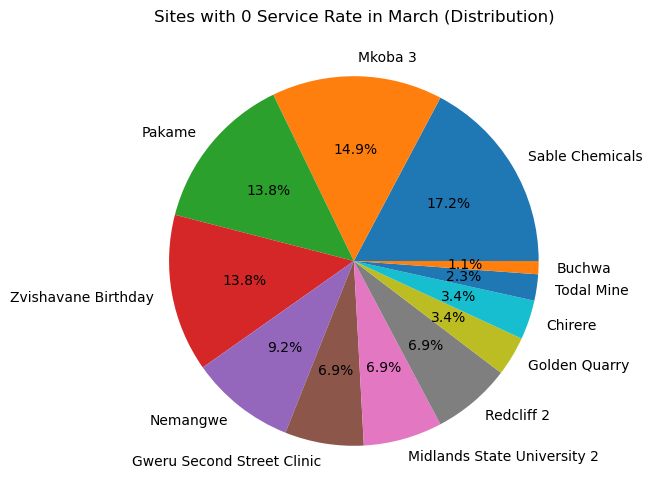

In [74]:
march_data = df_analysis[(df_analysis.ServiceRate == 0) & (df_analysis["Begin Time"] <= "2024-03-01") & (df_analysis["End Time"] < "2024-03-27")]
site_names = march_data ['SiteName'].value_counts().index.to_numpy()
site_counts = march_data ['SiteName'].value_counts().to_numpy()
plt.figure(figsize=(6, 6))  
plt.pie(site_counts, labels=site_names, autopct="%1.1f%%")  
plt.title("Sites with 0 Service Rate in March (Distribution)")
plt.show()

In [75]:
#finding relationships between variables
correlations = df_analysis[['ServiceRate', 'TotalTraffic']].corr()
print(correlations)



              ServiceRate  TotalTraffic
ServiceRate      1.000000      0.118654
TotalTraffic     0.118654      1.000000


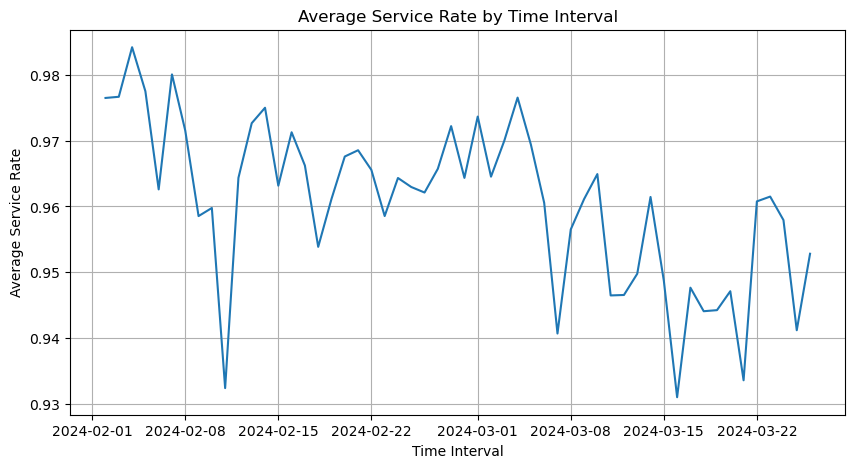

In [76]:


df_grouped = df_analysis.groupby(df_analysis['End Time'])['ServiceRate'].mean()
time_interval = df_grouped.index.to_numpy()  
average_service_rate = df_grouped.to_numpy()  


plt.figure(figsize=(10, 5))  # 
plt.plot(time_interval, average_service_rate)
plt.xlabel('Time Interval')
plt.ylabel('Average Service Rate')
plt.title('Average Service Rate by Time Interval')
plt.grid(True)
plt.show()


In [77]:
df_analysis.SiteName


0        Midlands State University 2
1        Midlands State University 2
2        Midlands State University 2
3        Midlands State University 2
4        Midlands State University 2
                    ...             
45763                Zvishavane Peak
45764                Zvishavane Peak
45777                   Mount Shamba
45778                   Mount Shamba
45779                   Mount Shamba
Name: SiteName, Length: 41106, dtype: object

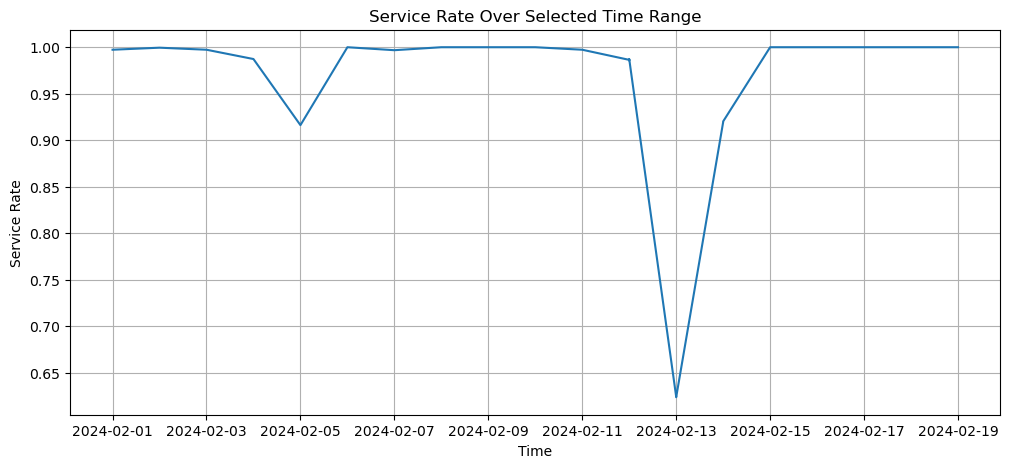

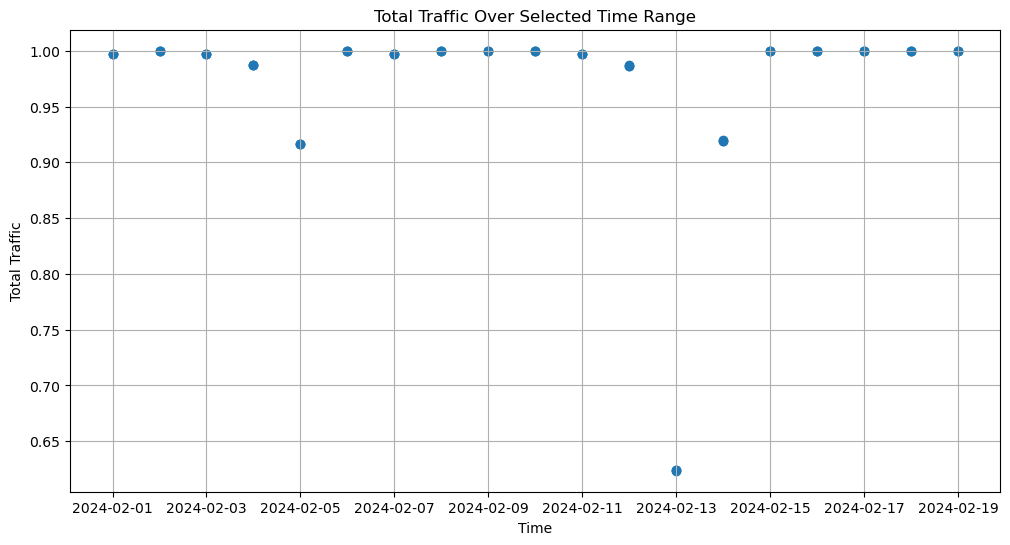

In [78]:
start_time = '2024-02-01'
end_time = '2024-02-20'

df_name = df_analysis[df_analysis['SiteName'] == 'Milsonia']
mask = (df_name['Begin Time'] >= start_time) & (df_name['End Time'] <= end_time)
filtered_df = df_name.loc[mask]

filtered_df.set_index('Begin Time', inplace=True)

# Plot ServiceRate
plt.figure(figsize=(12, 5))
plt.plot(filtered_df.index, filtered_df['ServiceRate'])
plt.xlabel('Time')
plt.ylabel('Service Rate')
plt.title('Service Rate Over Selected Time Range')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot TotalTraffic
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df.index, filtered_df['ServiceRate'])
plt.xlabel('Time')
plt.ylabel('Total Traffic')
plt.title('Total Traffic Over Selected Time Range')
plt.xticks(rotation=0)

plt.grid(True)
plt.show()



In [79]:
df_name = df_analysis[df_analysis['SiteName'] == 'Milsonia']
df_name.shape

(162, 9)